# 📊 Telco Customer Churn Analysis

Customer churn is a major issue in the telecom industry. This project uses machine learning and data analysis techniques to understand which factors lead to customer churn and build a predictive model to identify high-risk customers.

We used Python for data preprocessing, EDA, and modeling, and evaluated the model using accuracy, F1 score, and ROC-AUC metrics.

## 📁 Dataset Information

The dataset was sourced from IBM Sample Datasets and contains 7,043 customer records with the following features:

- `CustomerID`: Unique identifier (dropped in analysis)
- `Gender`, `SeniorCitizen`, `Partner`, `Dependents`
- `Tenure`: Number of months with the company
- `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, etc.
- `Contract`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`
- `Churn`: Target variable (Yes/No)

We performed data cleaning, handled missing values, and converted categorical variables using one-hot encoding.


In [38]:
# --- Step 1: Import Libraries & Load Dataset ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the raw dataset (change path if needed)
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

# Quick look at data shape and columns
print(" Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


 Dataset loaded successfully!
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# --- Step 2: Basic Cleaning ---

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Convert 'TotalCharges' to numeric (some are empty strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Convert SeniorCitizen 0/1 to No/Yes
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"})

# Drop customerID (not useful for modeling)
df.drop("customerID", axis=1, inplace=True)

print(" Columns cleaned and transformed.")


 Columns cleaned and transformed.


In [40]:
# --- Step 3: Missing Value Handling ---

# Show nulls
missing = df.isnull().sum()
missing[missing > 0]


TotalCharges    11
dtype: int64

In [41]:
# Drop rows with missing TotalCharges (~11 rows)
df.dropna(inplace=True)

print(" Missing rows dropped.")
print("Final shape:", df.shape)


 Missing rows dropped.
Final shape: (7032, 20)


In [42]:
# Save cleaned data to use in later steps
df.to_csv("df_cleaned.csv", index=False)
print(" Saved cleaned dataset as df_cleaned.csv")


 Saved cleaned dataset as df_cleaned.csv


C:\Users\mk199\AppData\Local\Temp\ipykernel_23768\362183869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


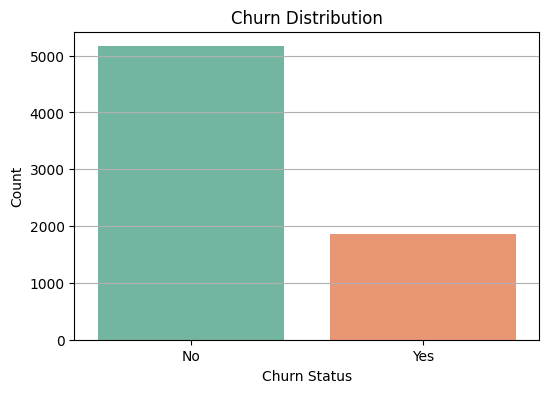

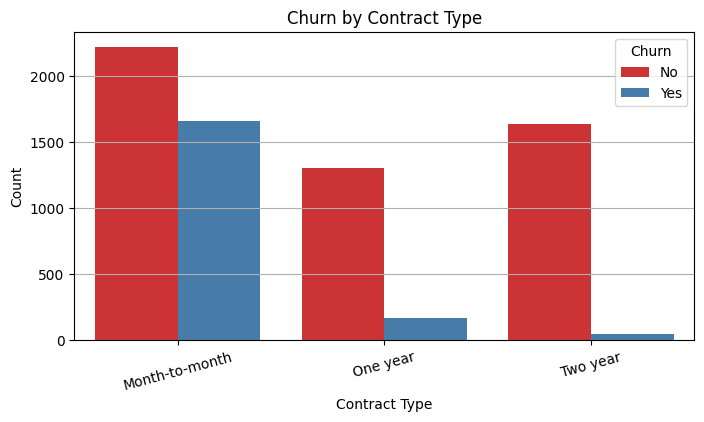

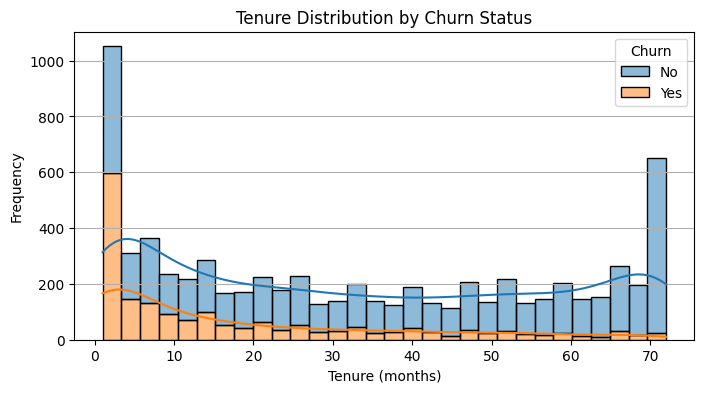

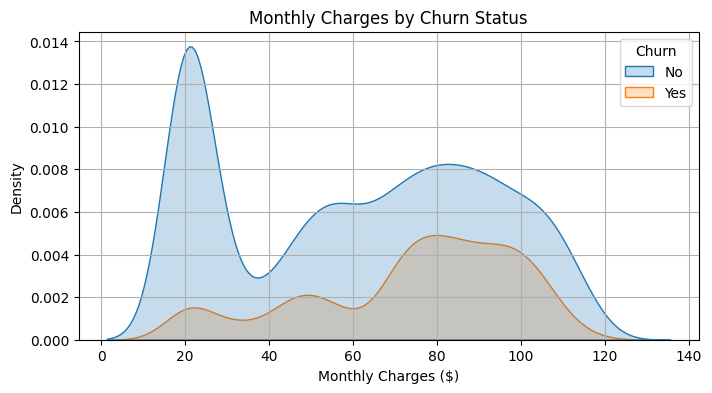

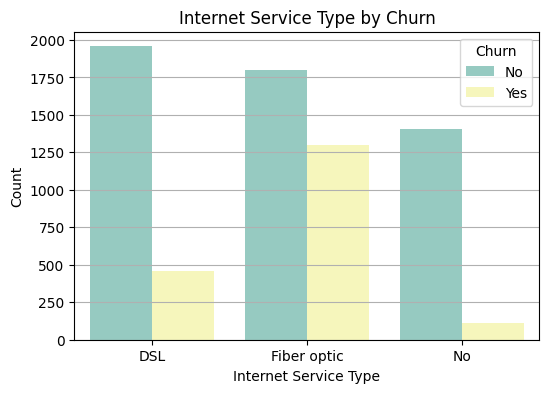

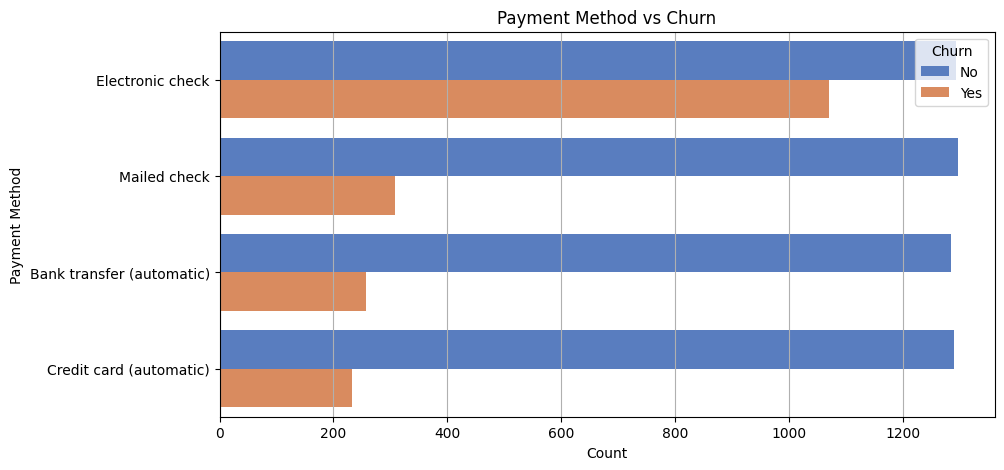

In [43]:
import os
os.makedirs(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images", exist_ok=True)

# 1: Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.grid(axis='y')
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\churn_distribution.png")
plt.show()

# 2: Contract Type vs Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Contract", hue="Churn", palette="Set1")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\contract_churn.png")
plt.show()

# 3: Tenure Distribution by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, multiple="stack")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\tenure_distribution.png")
plt.show()

# 4: Monthly Charges vs Churn
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.grid()
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\monthlycharges_churn.png")
plt.show()

# 5: Internet Service vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="Set3")
plt.title("Internet Service Type by Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\internetservice_churn.png")
plt.show()

# 6: Payment Method vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="PaymentMethod", hue="Churn", palette="muted")
plt.title("Payment Method vs Churn")
plt.ylabel("Payment Method")
plt.xlabel("Count")
plt.grid(axis='x')
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\paymentmethod_churn.png")
plt.show()



In [44]:
# --- Feature Engineering ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Encode categorical columns using get_dummies ---
df_encoded = pd.get_dummies(df, drop_first=True)
print(" Categorical columns encoded.")
df_encoded.head()

# --- Separate Features and Target ---
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-test split completed.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- Standardize numeric columns ---
scaler = StandardScaler()

# Identify numeric columns only
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove("tenure") if "tenure" in numeric_cols else None  # optional

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Numeric columns scaled.")

# Save preprocessed data if needed
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print(" Preprocessed files saved.")

 Categorical columns encoded.
Train-test split completed.
X_train shape: (5625, 30)
X_test shape: (1407, 30)
Numeric columns scaled.
 Preprocessed files saved.


 Logistic Regression Results
Accuracy  : 0.8024
F1 Score  : 0.6051
ROC AUC   : 0.8362
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



C:\Users\mk199\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


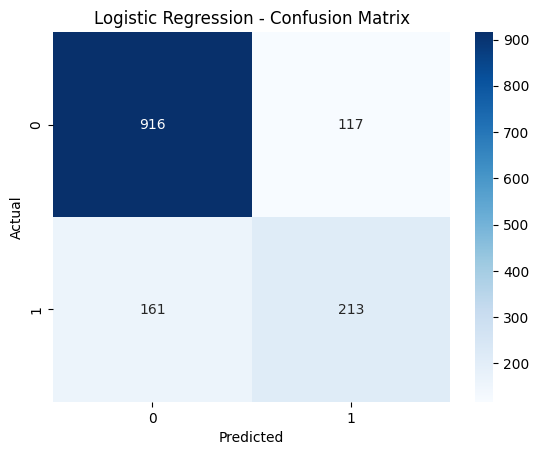

 Random Forest Results
Accuracy  : 0.7839
F1 Score  : 0.5449
ROC AUC   : 0.8166
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



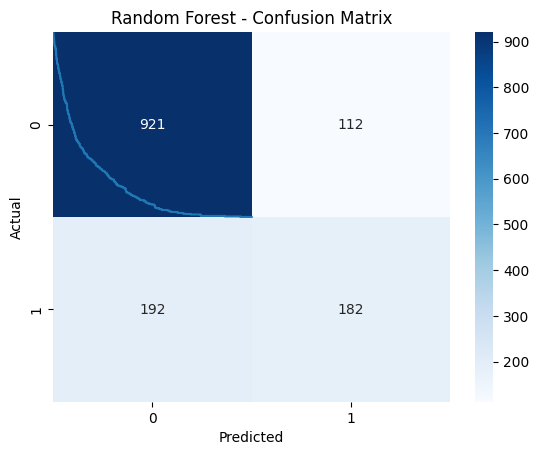

C:\Users\mk199\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 XGBoost Results
Accuracy  : 0.7783
F1 Score  : 0.5679
ROC AUC   : 0.8197
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1033
        True       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



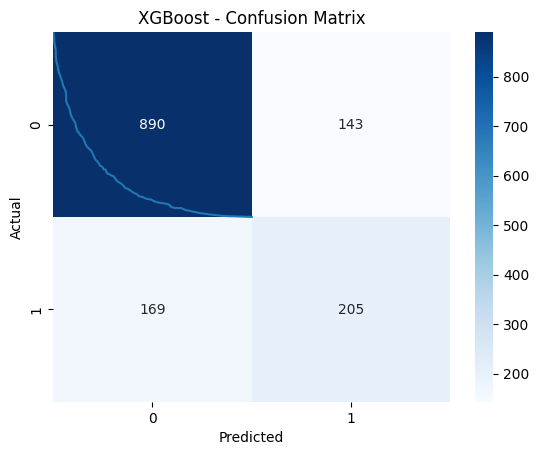

 Logistic Regression Results
Accuracy  : 0.8024
F1 Score  : 0.6051
ROC AUC   : 0.8362
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



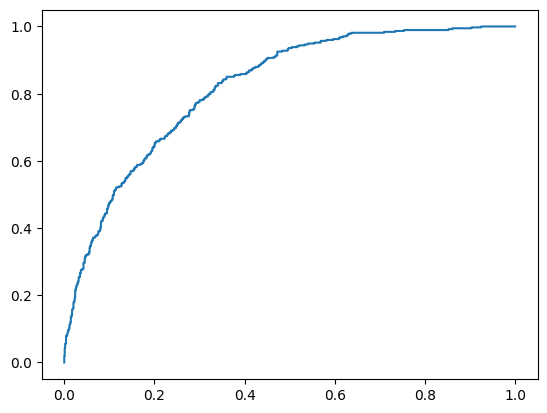

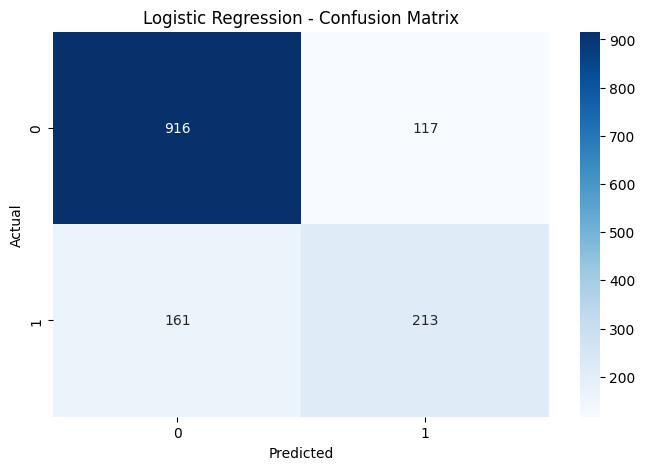

 Random Forest Results
Accuracy  : 0.7839
F1 Score  : 0.5449
ROC AUC   : 0.8166
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



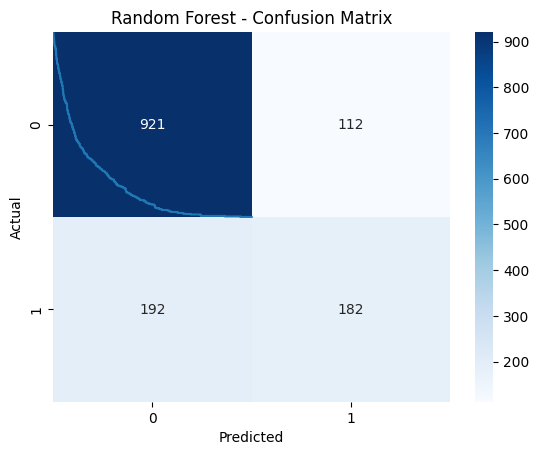

 XGBoost Results
Accuracy  : 0.7783
F1 Score  : 0.5679
ROC AUC   : 0.8197
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1033
        True       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



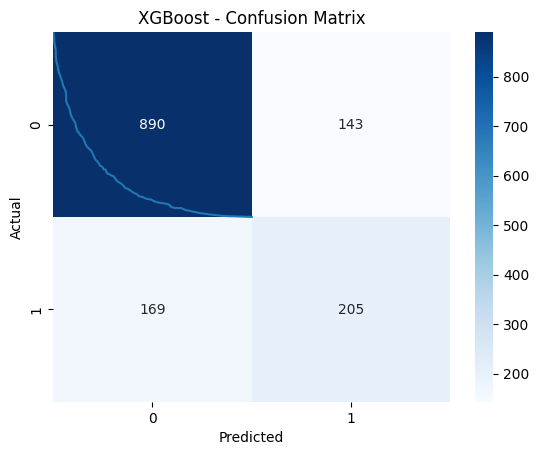

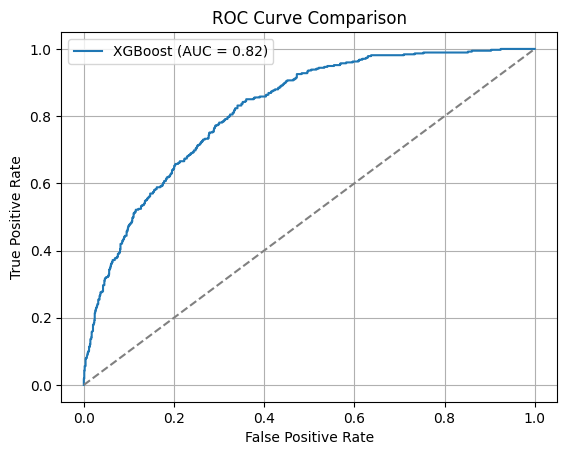

In [45]:
# --- ML Models & Evaluation Tools ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# --- Evaluation Function ---
def evaluate_model(name, model, X_test, y_test, probs):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, probs)

    print(f" {name} Results")
    print(f"Accuracy  : {acc:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC AUC   : {roc_auc:.4f}")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\Confusion Matrix.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# --- Logistic Regression ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

probs_logreg = logreg.predict_proba(X_test)[:, 1]
evaluate_model("Logistic Regression", logreg, X_test, y_test, probs_logreg)

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

probs_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", rf, X_test, y_test, probs_rf)

# --- XGBoost ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

probs_xgb = xgb.predict_proba(X_test)[:, 1]
evaluate_model("XGBoost", xgb, X_test, y_test, probs_xgb)

# --- Combined ROC Curve ---
plt.figure(figsize=(8, 5))
evaluate_model("Logistic Regression", logreg, X_test, y_test, probs_logreg)
evaluate_model("Random Forest", rf, X_test, y_test, probs_rf)
evaluate_model("XGBoost", xgb, X_test, y_test, probs_xgb)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.savefig(r"C:\Users\mk199\OneDrive\Desktop\Ronak\Internship\Codeshape\Telco Customer Churn Analysis\images\roc_comparison.png")
plt.show()


<!-- <-- 5: Model Performance Summary (Comparison Table) --> -->

| Model                   | Accuracy     | F1 Score   | ROC AUC      |
| ----------------------- | ------------ | ---------- | ----------   |
| **Logistic Regression** | **0.8024**   | **0.6051** | **0.8362**   |
| Random Forest           | 0.7839       | 0.5449     | 0.8166       |
| XGBoost                 | 0.7783       | 0.5679     | 0.8197       |


✅ Short Summary (Bullet Points)
--> 📊 Built a data-driven solution to predict customer churn for a telecom company.

--> 🔍 Applied data cleaning, exploratory analysis, and feature engineering.

--> 🧠 Trained and evaluated 3 models: Logistic Regression, Random Forest, and XGBoost.

--> 🎯 Achieved 80% accuracy and 0.84 ROC-AUC with Logistic Regression.

--> 📁 Delivered insights through visuals and saved all artifacts in a reusable format.

✅ Key Takeaways (Bullet Points)
--> ⚠️ Month-to-month contracts have the highest churn rate.

--> 💰 Customers with higher monthly charges are more likely to leave.

--> ⏳ Longer-tenure customers are more loyal and less likely to churn.

--> 🌐 Fiber-optic internet users showed a higher likelihood of churning.

--> 🎯 Early identification of high-risk customers enables targeted retention strategies.